In [1]:
import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

from sklearn.model_selection import train_test_split

# LDA

## Import

In [2]:
df = pd.read_csv("data/original_data.csv")

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0, stratify=df['genre'])
df_train

,id,movie_name,synopsis,genre
39841,8315,Tommy Atkins,A cleric enlists on learning he loves his brot...,action
22314,4958,Hostage,"When a family is held hostage, former hostage ...",action
33001,21828,Eternity Island,Details kept under wrap.,crime
6291,66791,69 Reality in Us,"A Twisted triangle love, where a man feels the...",romance
1256,26554,"Goodnight, Sweetheart",A journalist attacks the campaign of a mayoral...,crime
...,...,...,...,...
7115,11151,Mr. Moon,"Mr. Dennis Hope, the man who actually owns the...",adventure
49426,65700,Ben & Arthur,A pair of recently married gay men are threate...,romance
50639,49827,Death Club,"After five friends break into a shut down, aba...",horror
45494,85181,O Homem dos Olhos Tortos,A gang of criminals is persecuted by two detec...,thriller


In [3]:
df_train, x_train = functions.preprocessing(df=df_train, remove_useless_sentences = True, is_train = True, tokenize=True, remove_one_characters=True, lemmatize=True, remove_stop_words=True)
y_train = functions.target_variable(df_train, 'genre')
print(df_train.shape)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(42979, 4)


In [4]:
x_train

[['cleric',
  'enlists',
  'learning',
  'love',
  'brother',
  'sweetheart',
  'save',
  'life',
  'find',
  'earl'],
 ['family',
  'held',
  'hostage',
  'hostage',
  'negotiator',
  'jeff',
  'talley',
  'arrives',
  'scene',
  'talley',
  'family',
  'kidnapped',
  'talley',
  'decide',
  'important',
  'saving',
  'family',
  'doesn',
  'know',
  'saving',
  'family'],
 ['detail', 'kept', 'wrap'],
 ['twisted',
  'triangle',
  'love',
  'man',
  'feel',
  'pressure',
  'woman',
  'different',
  'age',
  'different',
  'demand'],
 ['journalist',
  'attack',
  'campaign',
  'mayoral',
  'candidate',
  'ha',
  'gained',
  'endorsement',
  'rival',
  'newspaper'],
 ['reared',
  'childless',
  'ape',
  'orphaned',
  'heir',
  'greystokes',
  'ape',
  'dr',
  'porter',
  'organises',
  'rescue',
  'expedition',
  'beautiful',
  'daughter',
  'jane',
  'catch',
  'attention',
  'ha',
  'tarzan',
  'ape',
  'found',
  'perfect',
  'mate'],
 ['charleston',
  'south',
  'carolina',
  'find',

## Dictionary and corpus creation

In [5]:
from gensim.corpora import Dictionary

## Remove rare and common tokens.
# Create a dictionary representation of the documents.
dictionary = Dictionary(x_train)

print("Dictionary lenght 1):", len(dictionary))

# Filter out words that occur less than 5 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.4)
print("Dictionary lenght 2):",len(dictionary))

Dictionary lenght 1): 37204
Dictionary lenght 2): 10533


In [6]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in x_train]

In [7]:
print(corpus[0])
x_train[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


['cleric',
 'enlists',
 'learning',
 'love',
 'brother',
 'sweetheart',
 'save',
 'life',
 'find',
 'earl']

In [8]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 10533
Number of documents: 42979


## LDA

In [9]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
alpha = 'auto'
eta = 'auto'

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha=alpha,
    eta=eta,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [10]:
id2word

{0: 'brother',
 1: 'cleric',
 2: 'earl',
 3: 'enlists',
 4: 'find',
 5: 'learning',
 6: 'life',
 7: 'love',
 8: 'save',
 9: 'sweetheart',
 10: 'arrives',
 11: 'decide',
 12: 'doesn',
 13: 'family',
 14: 'held',
 15: 'hostage',
 16: 'important',
 17: 'jeff',
 18: 'kidnapped',
 19: 'know',
 20: 'negotiator',
 21: 'saving',
 22: 'scene',
 23: 'detail',
 24: 'kept',
 25: 'wrap',
 26: 'age',
 27: 'demand',
 28: 'different',
 29: 'feel',
 30: 'man',
 31: 'pressure',
 32: 'triangle',
 33: 'twisted',
 34: 'woman',
 35: 'attack',
 36: 'campaign',
 37: 'candidate',
 38: 'gained',
 39: 'ha',
 40: 'journalist',
 41: 'mayoral',
 42: 'newspaper',
 43: 'rival',
 44: 'ape',
 45: 'attention',
 46: 'beautiful',
 47: 'catch',
 48: 'childless',
 49: 'daughter',
 50: 'dr',
 51: 'expedition',
 52: 'found',
 53: 'heir',
 54: 'jane',
 55: 'mate',
 56: 'orphaned',
 57: 'perfect',
 58: 'porter',
 59: 'rescue',
 60: 'tarzan',
 61: 'battle',
 62: 'carolina',
 63: 'civil',
 64: 'come',
 65: 'confederate',
 66: 'hi

In [11]:
# top 20 words for each topic
top_topics = model.top_topics(corpus, topn=200)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

for topic in top_topics:
    print()
    print (topic[1], [w[1] for w in topic[0]])

Average topic coherence: -15.6912.

-8.540522805911676 ['life', 'find', 'ha', 'woman', 'world', 'family', 'new', 'mysterious', 'secret', 'home', 'people', 'day', 'come', 'turn', 'child', 'way', 'past', 'begin', 'house', 'couple', 'discovers', 'escape', 'face', 'night', 'end', 'start', 'dark', 'lead', 'discover', 'work', 'village', 'thing', 'forced', 'soon', 'event', 'change', 'real', 'man', 'place', 'struggle', 'trying', 'living', 'ghost', 'missing', 'decides', 'strange', 'dangerous', 'job', 'teenage', 'know', 'live', 'little', 'ancient', 'car', 'country', 'creature', 'encounter', 'spirit', 'break', 'accident', 'left', 'supernatural', 'haunted', 'memory', 'married', 'trapped', 'stranger', 'working', 'suspect', 'middle', 'guy', 'wrong', 'unknown', 'artist', 'hand', 'going', 'marriage', 'hidden', 'person', 'turned', 'wake', 'deal', 'violent', 'nightmare', 'visit', 'deep', 'sinister', 'history', 'different', 'chance', 'experience', 'taking', 'abandoned', 'dr', 'arrives', 'universe', 'late

### Coherence curve

In [13]:
# coherence curve

avg_coherences = []
for k in range(3, 13):
    # Set training parameters.
    num_topics = k
    chunksize = 2000
    passes = 20
    iterations = 400
    eval_every = None  # Don't evaluate model perplexity, takes too much time.

    # Make an index to word dictionary.
    temp = dictionary[0]  # This is only to "load" the dictionary.
    id2word = dictionary.id2token

    model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every
    )

    # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
    avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
    print('Average topic coherence with k = {}: {}'.format(k, avg_topic_coherence))
    avg_coherences.append(avg_topic_coherence)


Average topic coherence with k = 3: -23.80072231375841
Average topic coherence with k = 4: -17.850541735318807
Average topic coherence with k = 5: -14.280433388255044
Average topic coherence with k = 6: -11.900361156879205
Average topic coherence with k = 7: -10.200309563039317
Average topic coherence with k = 8: -8.925270867659403
Average topic coherence with k = 9: -7.933574104586136
Average topic coherence with k = 10: -7.140216694127522
Average topic coherence with k = 11: -6.491106085570475
Average topic coherence with k = 12: -5.9501805784396025


In [14]:
avg_coherences

[-23.80072231375841,
 -17.850541735318807,
 -14.280433388255044,
 -11.900361156879205,
 -10.200309563039317,
 -8.925270867659403,
 -7.933574104586136,
 -7.140216694127522,
 -6.491106085570475,
 -5.9501805784396025]

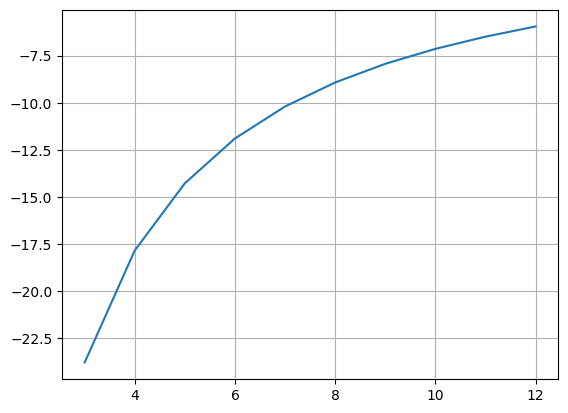

In [17]:
ks = np.arange(3,13)
plt.plot(ks, avg_coherences)
plt.grid()
plt.show()

### Choose a model and evaluate it

In [12]:
def plot_difference_plotly(mdiff, title="", annotation=None):
    """Plot the difference between models.

    Uses plotly as the backend."""
    import plotly.graph_objs as go
    import plotly.offline as py

    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                for (int_tokens, diff_tokens) in row
            ]
            for row in annotation
        ]

    data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = go.Layout(width=950, height=950, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))


def plot_difference_matplotlib(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)

try:
    get_ipython()
    import plotly.offline as py
except Exception:
    #
    # Fall back to matplotlib if we're not in a notebook, or if plotly is
    # unavailable for whatever reason.
    #
    plot_difference = plot_difference_matplotlib
else:
    py.init_notebook_mode()
    plot_difference = plot_difference_plotly

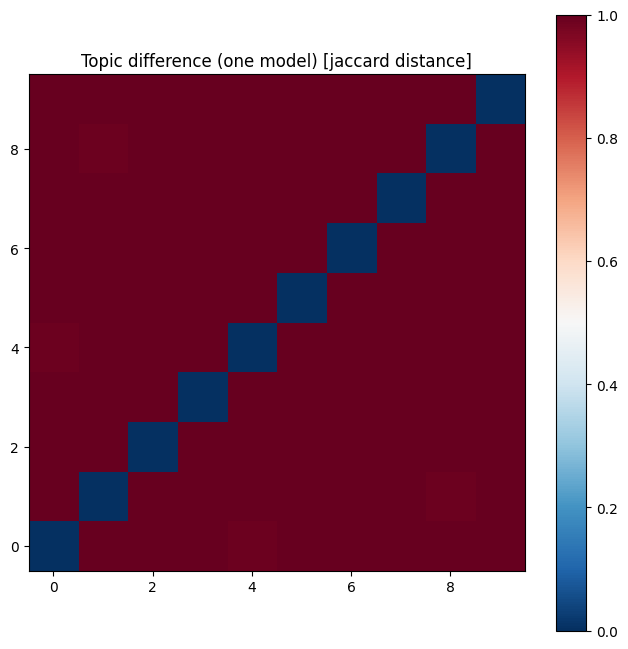

In [13]:
mdiff, annotation = model.diff(model, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

### Are the topics related to genres?

Test with 10 topics:

In [14]:
df_train['tokens'] = x_train

In [15]:
lexicon_new = functions.create_lexicon(df_train, genre_col='genre', clean_synopsis_col='tokens')

100%|██████████| 10/10 [00:00<00:00, 123.47it/s]


In [16]:
top_topics = model.top_topics(corpus, topn=100)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

for topic in top_topics:
    print()
    print (topic[1], [w[1] for w in topic[0]])

Average topic coherence: -12.3733.

-5.253229670276453 ['life', 'find', 'ha', 'woman', 'world', 'family', 'new', 'mysterious', 'secret', 'home', 'people', 'day', 'come', 'turn', 'child', 'way', 'past', 'begin', 'house', 'couple', 'discovers', 'escape', 'face', 'night', 'end', 'start', 'dark', 'lead', 'discover', 'work', 'village', 'thing', 'forced', 'soon', 'event', 'change', 'real', 'man', 'place', 'struggle', 'trying', 'living', 'ghost', 'missing', 'decides', 'strange', 'dangerous', 'job', 'teenage', 'know', 'live', 'little', 'ancient', 'car', 'country', 'creature', 'encounter', 'spirit', 'break', 'accident', 'left', 'supernatural', 'haunted', 'memory', 'married', 'trapped', 'stranger', 'working', 'suspect', 'middle', 'guy', 'wrong', 'unknown', 'artist', 'hand', 'going', 'marriage', 'hidden', 'person', 'turned', 'wake', 'deal', 'violent', 'nightmare', 'visit', 'deep', 'sinister', 'history', 'different', 'chance', 'experience', 'taking', 'abandoned', 'dr', 'arrives', 'universe', 'late

In [17]:
from tqdm import tqdm

def genre_topic_mapping(top_topics, genres, lexicon_new, verbose=False, return_counts=False):
    # Creates a genre-topic mapping
    genre_mapping = {}
    genres = np.unique(df_train['genre'].values)
    print(genres)
    counts = {}

    for genre in tqdm(genres):
        genre_counts = []
        genre_set = set(lexicon_new[genre])
        length_prev = -1
        related_topic = -1

        for topic in range(num_topics):
            topic_list = list(x for x in top_topics[topic])

            topic_word_list = list(x[1] for x in topic_list[0])
            word_set = set(topic_word_list)
            
            length = len(genre_set.intersection(word_set))
            if verbose == True:
                print(genre, topic, length)
            if length > length_prev:
                length_prev = length
                related_topic = topic

            if return_counts == True:
                genre_counts.append(length)

        if return_counts == True:
            counts[genre] = genre_counts

        genre_mapping[genre] = related_topic

    print(genre_mapping)

    if return_counts == True:
        return counts

In [18]:
genres = np.unique(df_train['genre'])

In [19]:
genre_topic_mapping(top_topics, genres, lexicon_new)

['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 148.85it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}


### Random search

In [31]:
import random
import itertools

In [42]:
def compute_lda(param_dict, corpus, dictionary, lexicon_new):
    # Set training parameters.
    num_topics = 10
    chunksize = 2000
    passes = 20
    iterations = 600
    eval_every = None  # Don't evaluate model perplexity, takes too much time.
    alpha = param_dict['alpha']
    eta = param_dict['eta']

    # Make an index to word dictionary.
    temp = dictionary[0]  # This is only to "load" the dictionary.
    id2word = dictionary.id2token

    model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        chunksize=chunksize,
        alpha=alpha,
        eta=eta,
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every
    )

    # 20 top words
    top_topics = model.top_topics(corpus, topn=20)

    # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
    avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
    print('Average topic coherence: %.4f.' % avg_topic_coherence)
    
    genre_topic_mapping(top_topics, genres, lexicon_new)
    print('for 20 words:', np.unique(genre_mapping.values()))

    # 50 top words
    top_topics = model.top_topics(corpus, topn=50)

    # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
    avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
    print('Average topic coherence: %.4f.' % avg_topic_coherence)
    
    genre_topic_mapping(top_topics, genres, lexicon_new)
    print('for 50 words:', np.unique(genre_mapping.values()))

In [43]:
hyperparameters = {
    'alpha' : [0.01, 0.1, 0.3, 0.5, 0.8],
    'eta' : [0.01, 0.1, 0.3, 0.5, 0.8, 1, 1.3, 2]
}

number_of_combinations = 10    # IMPORTANT

random_combinations = random.sample(list(itertools.product(*hyperparameters.values())), number_of_combinations) 

for idx, combo in enumerate(random_combinations):
    param_dict = dict(zip(hyperparameters.keys(), combo))
    print("Testing with hyperparameters:", param_dict)

    compute_lda(param_dict, corpus, dictionary, lexicon_new)

Testing with hyperparameters: {'alpha': 0.1, 'eta': 0.1}
Average topic coherence: -4.0795.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 199.74it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 20 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]


Average topic coherence: -5.7730.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 131.81it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 50 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]
Testing with hyperparameters: {'alpha': 0.8, 'eta': 0.01}


Average topic coherence: -4.0889.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 137.58it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 20 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]


Average topic coherence: -6.2894.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 134.00it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 1, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 50 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]
Testing with hyperparameters: {'alpha': 0.5, 'eta': 2}


Average topic coherence: -4.0381.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 213.24it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 20 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]


Average topic coherence: -5.8598.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 211.49it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 1, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 50 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]
Testing with hyperparameters: {'alpha': 0.3, 'eta': 1.3}


Average topic coherence: -4.3139.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 213.34it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 20 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]


Average topic coherence: -6.2794.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 213.25it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 50 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]
Testing with hyperparameters: {'alpha': 0.01, 'eta': 1.3}


Average topic coherence: -5.7154.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 158.95it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 20 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]


Average topic coherence: -6.8824.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 127.96it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 50 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]
Testing with hyperparameters: {'alpha': 0.1, 'eta': 1}


Average topic coherence: -4.0347.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 213.14it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 20 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]


Average topic coherence: -5.3770.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 211.53it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 50 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]
Testing with hyperparameters: {'alpha': 0.3, 'eta': 0.5}


Average topic coherence: -4.0701.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 161.47it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 20 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]


Average topic coherence: -5.6414.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 211.51it/s]

{'action': 0, 'adventure': 0, 'crime': 1, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 50 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]
Testing with hyperparameters: {'alpha': 0.01, 'eta': 0.8}


Average topic coherence: -4.4977.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 209.81it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 20 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]


Average topic coherence: -5.3611.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 211.53it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 50 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]
Testing with hyperparameters: {'alpha': 0.1, 'eta': 2}


Average topic coherence: -5.4646.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 116.35it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 20 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]


Average topic coherence: -7.0411.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 127.30it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 50 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]
Testing with hyperparameters: {'alpha': 0.01, 'eta': 0.01}


Average topic coherence: -4.4271.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 136.90it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 20 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]


Average topic coherence: -5.6471.
['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 130.88it/s]

{'action': 0, 'adventure': 0, 'crime': 0, 'family': 0, 'fantasy': 0, 'horror': 0, 'mystery': 0, 'romance': 0, 'scifi': 0, 'thriller': 0}
for 50 words: [dict_values([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]


## Explorative analysis

In [20]:
freq_dist = nltk.FreqDist(lexicon_new['action'])
freq_dist

FreqDist({'life': 426, 'man': 400, 'find': 395, 'young': 357, 'ha': 337, 'world': 309, 'group': 250, 'fight': 244, 'friend': 238, 'family': 234, ...})

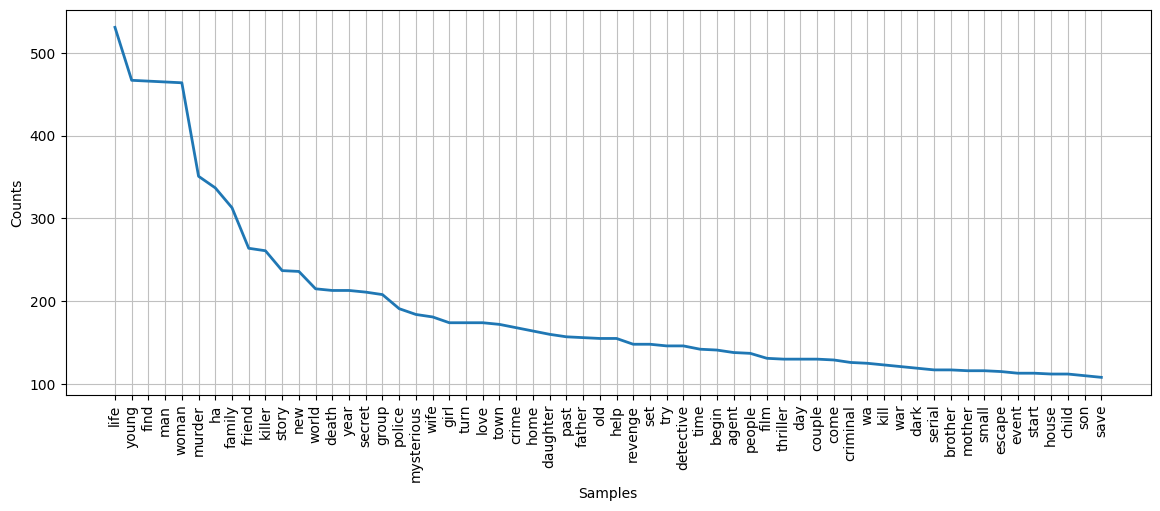

In [113]:
plt.figure(figsize=(14,5))
freq_dist.plot(60)
#plt.xticks(rotation=45, ha="right")
plt.show()

In [114]:
# filters words which have more than 150 appearances
frequencies_dict = dict(freq_dist)
print(len([x for x,y in frequencies_dict.items()]))
len([x for x,y in frequencies_dict.items() if y >= 150])

10741


31

In [115]:
# Get the set of words for the first genre
common_words = set(lexicon_new[genres[0]])

# Iterate over the remaining genres and find the intersection with the common_words set
for genre in genres[1:]:
    common_words = common_words.intersection(set(lexicon_new[genre]))

num_common_words = len(common_words)
print('Common words:', num_common_words)

Common words: 2562


In [122]:
# Hpw many words are left if we set an higher frequency threshold?
frequency_lexicon = {}
matrix = []

for i in tqdm(range(150,10,-1)):
    for genre in genres:
        freq_dist = nltk.FreqDist(lexicon_new[genre])
        frequencies_dict = dict(freq_dist)
        
        most_frequent = [x for x,y in frequencies_dict.items() if y >= i]
        frequency_lexicon[genre] = set(most_frequent) - set(common_words)

    matrix.append([len(x) for x in frequency_lexicon.values()])

print('New lexicons lenghts:', [len(x) for x in frequency_lexicon.values()])

100%|██████████| 140/140 [00:47<00:00,  2.95it/s]

New lexicons lenghts: [66, 73, 87, 73, 71, 94, 68, 48, 121, 64]


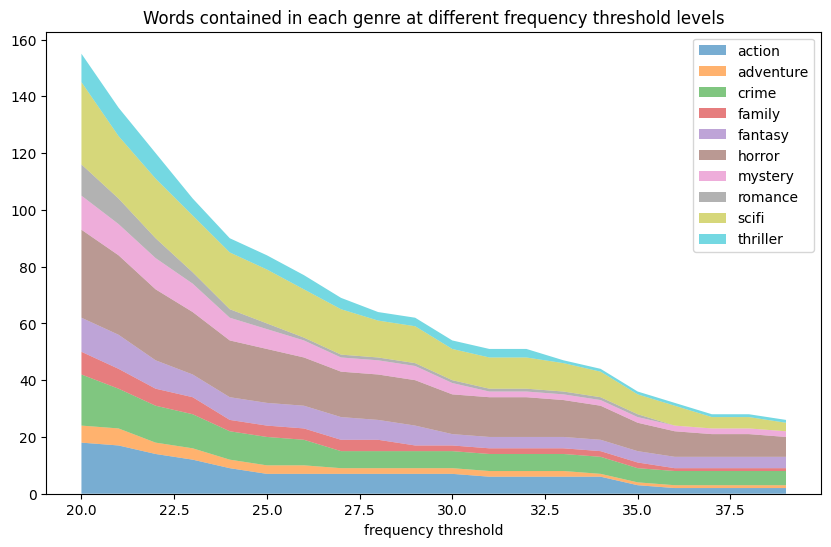

In [171]:
matrix.reverse()

arrays = [[x[i] for x in matrix[10:30]] for i in range(10)]
# Calculate the cumulative array
cumulative = np.sum(arrays, axis=0)

#for i in range(len(genres)):
#    plt.plot(arrays[i], label=genres[i], c=colors(i))

plt.figure(figsize=(10,6))
# Remember that the arrays always start from 10 for frequency
plt.stackplot(range(20,40), arrays, labels=genres, alpha=0.6)
#plt.plot(cumulative, color='black', linewidth=2, label='Cumulative Array')
plt.title('Words contained in each genre at different frequency threshold levels')
plt.xlabel('frequency threshold')
plt.legend()
plt.show()

In [35]:
frequency_lexicon['romance']

{'1930s',
 'adopted',
 'advertising',
 'affection',
 'arranged',
 'aspiring',
 'athens',
 'attracted',
 'blonde',
 'blossom',
 'boxer',
 'commitment',
 'composer',
 'depressed',
 'difficulty',
 'dumped',
 'emperor',
 'engaged',
 'farmer',
 'fashion',
 'festival',
 'gay',
 'grow',
 'happily',
 'heiress',
 'helping',
 'horse',
 'irish',
 'jealous',
 'jewish',
 'juliet',
 'lesson',
 'maid',
 'maya',
 'obsession',
 'obstacle',
 'painter',
 'peasant',
 'playboy',
 'poet',
 'pretend',
 'rebellious',
 'secretary',
 'song',
 'spoiled',
 'suitor',
 'sweet',
 'sweetheart',
 'ups',
 'wed',
 'woo'}

In [120]:
top_topics = model.top_topics(corpus, topn=300)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

for topic in top_topics:
    print()
    print (topic[1], [w[1] for w in topic[0]])

Average topic coherence: -17.3891.

-11.5710675428542 ['life', 'find', 'ha', 'woman', 'world', 'family', 'new', 'mysterious', 'secret', 'home', 'people', 'day', 'come', 'turn', 'child', 'way', 'past', 'begin', 'house', 'couple', 'discovers', 'escape', 'face', 'night', 'end', 'start', 'dark', 'lead', 'discover', 'work', 'village', 'thing', 'forced', 'soon', 'event', 'change', 'real', 'man', 'place', 'struggle', 'trying', 'living', 'ghost', 'missing', 'decides', 'strange', 'dangerous', 'job', 'teenage', 'know', 'live', 'little', 'ancient', 'car', 'country', 'creature', 'encounter', 'spirit', 'break', 'accident', 'left', 'supernatural', 'haunted', 'memory', 'married', 'trapped', 'stranger', 'working', 'suspect', 'middle', 'guy', 'wrong', 'unknown', 'artist', 'hand', 'going', 'marriage', 'hidden', 'person', 'turned', 'wake', 'deal', 'violent', 'nightmare', 'visit', 'deep', 'sinister', 'history', 'different', 'chance', 'experience', 'taking', 'abandoned', 'dr', 'arrives', 'universe', 'late'

In [108]:
counts = genre_topic_mapping(top_topics, genres, frequency_lexicon, verbose=False, return_counts=True)

['action' 'adventure' 'crime' 'family' 'fantasy' 'horror' 'mystery'
 'romance' 'scifi' 'thriller']


100%|██████████| 10/10 [00:00<00:00, 12267.63it/s]

{'action': 3, 'adventure': 3, 'crime': 3, 'family': 4, 'fantasy': 3, 'horror': 2, 'mystery': 8, 'romance': 9, 'scifi': 6, 'thriller': 3}


In [109]:
counts

{'action': [3, 3, 2, 20, 8, 5, 9, 3, 6, 9],
 'adventure': [2, 4, 3, 21, 10, 10, 4, 6, 5, 6],
 'crime': [3, 2, 11, 19, 8, 5, 5, 4, 6, 5],
 'family': [0, 4, 2, 3, 9, 9, 6, 8, 9, 8],
 'fantasy': [2, 4, 10, 12, 9, 10, 4, 5, 7, 8],
 'horror': [6, 2, 11, 6, 11, 8, 10, 5, 8, 5],
 'mystery': [7, 2, 8, 3, 5, 4, 7, 3, 9, 5],
 'romance': [1, 4, 3, 3, 4, 3, 2, 4, 2, 8],
 'scifi': [5, 2, 8, 9, 10, 10, 15, 11, 5, 11],
 'thriller': [8, 2, 7, 11, 7, 5, 8, 4, 5, 4]}

In [110]:
matrix = np.array([x for x in counts.values()])

# Calculate the maximum value for each topic
max_values = np.sum(matrix, axis=0)

# Normalize the matrix by topic
#counts = matrix / max_values

# Normalize the matrix between 0 and 1
counts = (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix))

print(counts)

[[0.14285714 0.14285714 0.0952381  0.95238095 0.38095238 0.23809524
  0.42857143 0.14285714 0.28571429 0.42857143]
 [0.0952381  0.19047619 0.14285714 1.         0.47619048 0.47619048
  0.19047619 0.28571429 0.23809524 0.28571429]
 [0.14285714 0.0952381  0.52380952 0.9047619  0.38095238 0.23809524
  0.23809524 0.19047619 0.28571429 0.23809524]
 [0.         0.19047619 0.0952381  0.14285714 0.42857143 0.42857143
  0.28571429 0.38095238 0.42857143 0.38095238]
 [0.0952381  0.19047619 0.47619048 0.57142857 0.42857143 0.47619048
  0.19047619 0.23809524 0.33333333 0.38095238]
 [0.28571429 0.0952381  0.52380952 0.28571429 0.52380952 0.38095238
  0.47619048 0.23809524 0.38095238 0.23809524]
 [0.33333333 0.0952381  0.38095238 0.14285714 0.23809524 0.19047619
  0.33333333 0.14285714 0.42857143 0.23809524]
 [0.04761905 0.19047619 0.14285714 0.14285714 0.19047619 0.14285714
  0.0952381  0.19047619 0.0952381  0.38095238]
 [0.23809524 0.0952381  0.38095238 0.42857143 0.47619048 0.47619048
  0.71428571

In [111]:
values = counts[:, 0]
values

array([0.14285714, 0.0952381 , 0.14285714, 0.        , 0.0952381 ,
       0.28571429, 0.33333333, 0.04761905, 0.23809524, 0.38095238])

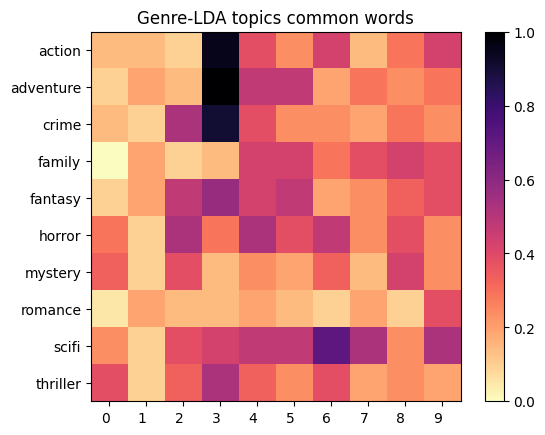

In [101]:
fig, ax = plt.subplots()
heatmap = ax.imshow(counts, cmap='magma_r')

topics = np.arange(10)
# Set the genre names as tick labels
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(topics)
ax.set_yticklabels(genres)

# Rotate the tick labels for better readability
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the title and display the plot
plt.title("Genre-LDA topics common words")
plt.show()

### How many words have the genres in common?

Nothing interesting from this plot, we may need to adjust parameters for dictionary creation (no_below, no_above)

In [91]:
df_train['BoW'] = corpus
df_train.head()

,id,movie_name,synopsis,genre,tokens,BoW
0,8315,Tommy Atkins,A cleric enlists on learning he loves his brot...,action,"[cleric, enlists, learning, love, brother, swe...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1..."
1,4958,Hostage,"When a family is held hostage, former hostage ...",action,"[family, held, hostage, hostage, negotiator, j...","[(10, 1), (11, 1), (12, 1), (13, 4), (14, 1), ..."
2,21828,Eternity Island,Details kept under wrap.,crime,"[detail, kept, wrap]","[(23, 1), (24, 1), (25, 1)]"
3,66791,69 Reality in Us,"A Twisted triangle love, where a man feels the...",romance,"[twisted, triangle, love, man, feel, pressure,...","[(7, 1), (26, 1), (27, 1), (28, 2), (29, 1), (..."
4,26554,"Goodnight, Sweetheart",A journalist attacks the campaign of a mayoral...,crime,"[journalist, attack, campaign, mayoral, candid...","[(35, 1), (36, 1), (37, 1), (38, 1), (39, 1), ..."


In [92]:
# I'm using the bag of owrds representation since we can adjust no_below and no_above for the tokens
lexicon_new = functions.create_lexicon(df_train, genre_col='genre', clean_synopsis_col='BoW')

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 113.50it/s]


I remove the common words which are present in all genres

In [93]:
# Get the set of words for the first genre
common_words = set(lexicon_new[genres[0]])

# Iterate over the remaining genres and find the intersection with the common_words set
for genre in genres[1:]:
    common_words = common_words.intersection(set(lexicon_new[genre]))

# Get the count of common words
num_common_words = len(common_words)

print("Number of words present in all genres:", num_common_words, '\n--------')
for key, idxinfo in zip([dictionary[w[0]] for w in common_words], common_words):
    print (key, idxinfo)

Number of words present in all genres: 2562 
--------
star (958, 1)
build (4427, 1)
uncover (562, 1)
emerge (5076, 1)
bond (2428, 1)
having (2032, 1)
related (3636, 1)
isolated (3374, 1)
appear (2245, 1)
threaten (1250, 1)
william (1983, 1)
property (854, 1)
came (6893, 1)
town (330, 1)
refugee (1375, 1)
scotland (2458, 1)
threatening (2062, 1)
pastor (2196, 1)
pretty (4236, 1)
government (805, 1)
death (543, 1)
swiss (1454, 1)
mix (7359, 1)
body (197, 1)
moved (3666, 1)
outcast (2671, 1)
exact (2013, 1)
police (756, 1)
catholic (1801, 1)
italy (1405, 1)
novelist (410, 1)
held (14, 1)
midst (3879, 1)
night (148, 1)
door (2360, 1)
wanting (1231, 1)
trained (4004, 1)
disease (969, 1)
potential (3009, 1)
shop (1880, 1)
fame (623, 1)
time (227, 1)
wish (361, 1)
device (2439, 1)
men (1485, 2)
bound (2826, 1)
area (2093, 1)
victorian (7602, 1)
tv (1831, 1)
waiting (1435, 1)
angeles (1173, 1)
fine (5687, 1)
arm (3039, 1)
waitress (2777, 1)
moon (1648, 1)
soldier (1386, 1)
arrived (6895, 1)
st

In [94]:
num_words = len(lexicon_new)
word_counts = np.zeros((num_words, num_words))

# function to compute the common words count matrix
def word_count(lexicon_new, diagonal=True):
    for i in range(num_words):
        genre1 = genres[i]
        words1 = set(lexicon_new[genre1])
        if diagonal == True:
            word_counts[i, i] = num_common_words   # I set the diagonal to this value to make things more readable

        for j in range(i+1, num_words):
            genre2 = genres[j]
            words2 = set(lexicon_new[genre2])

            common_words = words1.intersection(words2)
            word_counts[i, j] = len(common_words) - num_common_words   # removing the common words since are useless
            word_counts[j, i] = len(common_words) - num_common_words

    return word_counts

In [106]:
word_counts = word_count(lexicon_new)
word_counts

array([[2562., 3617., 3243., 3170., 3355., 2998., 3235., 3203., 3251.,
        3338.],
       [3617., 2562., 3135., 3493., 3668., 3082., 3274., 3313., 3382.,
        3241.],
       [3243., 3135., 2562., 2854., 2940., 2842., 3228., 3103., 2815.,
        3249.],
       [3170., 3493., 2854., 2562., 3441., 2868., 3033., 3233., 2965.,
        3013.],
       [3355., 3668., 2940., 3441., 2562., 3217., 3274., 3254., 3376.,
        3186.],
       [2998., 3082., 2842., 2868., 3217., 2562., 3225., 2909., 3105.,
        3174.],
       [3235., 3274., 3228., 3033., 3274., 3225., 2562., 3254., 3117.,
        3432.],
       [3203., 3313., 3103., 3233., 3254., 2909., 3254., 2562., 2888.,
        3208.],
       [3251., 3382., 2815., 2965., 3376., 3105., 3117., 2888., 2562.,
        3148.],
       [3338., 3241., 3249., 3013., 3186., 3174., 3432., 3208., 3148.,
        2562.]])

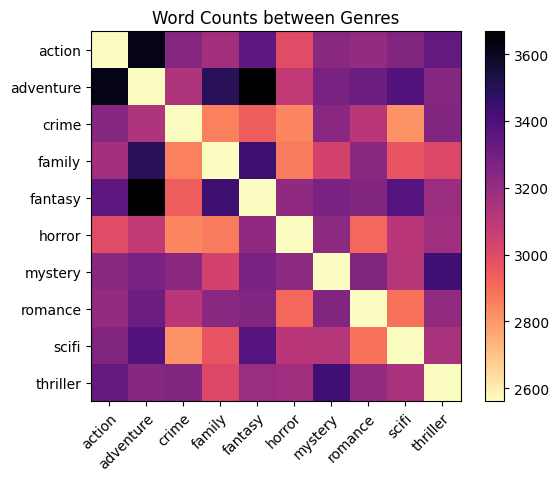

In [107]:
fig, ax = plt.subplots()
heatmap = ax.imshow(word_counts, cmap='magma_r')

# Set the genre names as tick labels
ax.set_xticks(np.arange(num_words))
ax.set_yticks(np.arange(num_words))
ax.set_xticklabels(genres)
ax.set_yticklabels(genres)

# Rotate the tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the title and display the plot
plt.title("Word Counts between Genres")
plt.show()

## LDAvis

### 10 components

In [8]:
df_train.head()

,id,movie_name,synopsis,genre
0,8315,Tommy Atkins,A cleric enlists on learning he loves his brot...,action
1,4958,Hostage,"When a family is held hostage, former hostage ...",action
2,21828,Eternity Island,Details kept under wrap.,crime
3,66791,69 Reality in Us,"A Twisted triangle love, where a man feels the...",romance
4,26554,"Goodnight, Sweetheart",A journalist attacks the campaign of a mayoral...,crime


In [9]:
df_train['synopsis']

0        A cleric enlists on learning he loves his brot...
1        When a family is held hostage, former hostage ...
2                                 Details kept under wrap.
3        A Twisted triangle love, where a man feels the...
4        A journalist attacks the campaign of a mayoral...
                               ...                        
42974    Mr. Dennis Hope, the man who actually owns the...
42975    A pair of recently married gay men are threate...
42976    After five friends break into a shut down, aba...
42977    A gang of criminals is persecuted by two detec...
42978    Confined in the castle tower by her father, Pr...
Name: synopsis, Length: 42979, dtype: object

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

en_stopwords = stopwords.words('english')

tf_vectorizer = CountVectorizer(stop_words=en_stopwords, max_df=0.5, min_df=5, max_features = 10000, ngram_range=(1,2))
tf = tf_vectorizer.fit_transform(df_train['synopsis'])

In [27]:
from sklearn.decomposition import LatentDirichletAllocation

n_components = 10

lda = LatentDirichletAllocation(n_components=n_components, max_iter=25,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda.fit(tf)

iteration: 1 of max_iter: 25
iteration: 2 of max_iter: 25
iteration: 3 of max_iter: 25
iteration: 4 of max_iter: 25
iteration: 5 of max_iter: 25
iteration: 6 of max_iter: 25
iteration: 7 of max_iter: 25
iteration: 8 of max_iter: 25
iteration: 9 of max_iter: 25
iteration: 10 of max_iter: 25
iteration: 11 of max_iter: 25
iteration: 12 of max_iter: 25
iteration: 13 of max_iter: 25
iteration: 14 of max_iter: 25
iteration: 15 of max_iter: 25
iteration: 16 of max_iter: 25
iteration: 17 of max_iter: 25
iteration: 18 of max_iter: 25
iteration: 19 of max_iter: 25
iteration: 20 of max_iter: 25
iteration: 21 of max_iter: 25
iteration: 22 of max_iter: 25
iteration: 23 of max_iter: 25
iteration: 24 of max_iter: 25
iteration: 25 of max_iter: 25


LatentDirichletAllocation(max_iter=25, n_jobs=-1, verbose=1)

In [28]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print()
        message = f'Topic {topic_idx}: '
        message += ', '.join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [171]:
lda_dict = {}
n_top_words = 100

for topic_idx, topic in enumerate(lda.components_):
    topic_words = [tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    lda_dict[topic_idx] = topic_words

len(lda_dict[0])

100

In [136]:
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names_out() # or get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topic 0: gang, new, agent, drug, city, team, high, secret, york, new york, school, crime, involved, becomes, two, criminal, group, ex, former, gets

Topic 1: world, must, evil, save, earth, fight, group, alien, battle, human, planet, stop, space, new, find, ancient, young, scientist, powers, order

Topic 2: old, year, boy, years, year old, school, mother, father, life, back, son, young, family, student, girl, high, later, child, young boy, finds

Topic 3: killer, police, murder, serial, detective, one, war, crime, officer, serial killer, murders, case, man, murdered, plot, mysterious, revenge, american, police officer, world war

Topic 4: story, life, one, love, day, world, true, tale, people, city, tells, based, lives, time, set, real, new, change, changes, way

Topic 5: death, get, friend, wife, life, best, home, back, returns, man, time, father, find, friends, things, go, must, prison, past, make

Topic 6: two, one, friends, group, three, lives, find, men, night, people, together, 

In [33]:
doc_topics = lda.transform(tf)
doc_topics

array([[0.00833357, 0.00833406, 0.14842826, ..., 0.00833445, 0.78489474,
        0.00833538],
       [0.00434879, 0.00434975, 0.08179871, ..., 0.00434851, 0.49321804,
        0.00434873],
       [0.03333437, 0.03333333, 0.03333333, ..., 0.03333634, 0.03333333,
        0.03333491],
       ...,
       [0.0055562 , 0.00555787, 0.00555578, ..., 0.00555854, 0.0890573 ,
        0.19931474],
       [0.31285569, 0.00555832, 0.00555644, ..., 0.00555591, 0.00555604,
        0.00555576],
       [0.00454627, 0.3194118 , 0.31993403, ..., 0.00454641, 0.0045488 ,
        0.00454636]])

In [34]:
print(doc_topics.shape)
doc_topics[10]

(42979, 10)


array([0.00588326, 0.00588288, 0.0058827 , 0.19520891, 0.00588356,
       0.00588275, 0.75772688, 0.00588341, 0.00588281, 0.00588284])

In [35]:
# The highest weighted topic is the one the document may be assigned to.
import numpy as np

np.argmax(doc_topics,axis=1)

array([8, 8, 3, ..., 6, 3, 5], dtype=int64)

In [36]:
import pyLDAvis
import pyLDAvis.lda_model

In [37]:
pyLDAvis.enable_notebook()

In [38]:
pyLDAvis.lda_model.prepare(lda,tf,tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.070316  0.184360       1        1  13.346204
8     -0.137933 -0.126363       2        1  13.144082
0      0.240062 -0.057990       3        1  10.789629
4     -0.082736  0.066067       4        1  10.022818
6     -0.101469  0.173919       5        1   9.923988
7     -0.041880  0.117942       6        1   9.623369
5     -0.036755 -0.147358       7        1   8.751000
2     -0.134425 -0.141439       8        1   8.724705
3      0.242486 -0.054081       9        1   8.559998
9     -0.017665 -0.015057      10        1   7.114208, topic_info=         Term         Freq        Total Category  logprob  loglift
9776    woman  2690.000000  2690.000000  Default  30.0000  30.0000
9196      two  3199.000000  3199.000000  Default  29.0000  29.0000
9932    young  4885.000000  4885.000000  Default  28.0000  28.0000
8309    story  2355.000000  2355.000000  Default  27.0000  27.0000
5026     life  3644.000000  3644.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
4720  journey   169.639957   877.463293  Topic10  -5.5945   0.9997
3376    first   164.332822   782.191899  Topic10  -5.6263   1.0829
3513     four   154.726128   710.509996  Topic10  -5.6866   1.1187
9196      two   190.520041  3199.151674  Topic10  -5.4785  -0.1778
3106   family   161.432807  2670.674171  Topic10  -5.6441  -0.1629

[698 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
3         3  0.095602               10
3         4  0.106850               10
3         5  0.022495               10
3         8  0.776067               10
4         8  0.987955          10 year
...     ...       ...              ...
9977      8  0.196205          younger
9977     10  0.610417          younger
9978     10  0.983702  younger brother
9994      1  0.926433           zombie
9994      6  0.073694           zombie

[1627 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 1, 5, 7, 8, 6, 3, 4, 10])

### 8 components

In [40]:
n_components = 8

lda = LatentDirichletAllocation(n_components=n_components, max_iter=20,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda.fit(tf)

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


LatentDirichletAllocation(max_iter=20, n_components=8, n_jobs=-1, verbose=1)

In [41]:
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names_out() # or get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topic 0: love, life, man, falls, story, young, girl, falls love, meets, woman, gets, daughter, beautiful, fall, young man, back, around, way, world, singer

Topic 1: new, life, find, journey, city, people, story, set, york, new york, takes, world, century, two, lost, group, one, search, true, young

Topic 2: young, town, family, woman, small, find, man, father, girl, home, couple, young woman, must, mysterious, mother, daughter, life, small town, one, day

Topic 3: world, must, evil, earth, save, film, horror, alien, planet, group, space, action, fight, take, mission, movie, stop, forces, face, battle

Topic 4: old, two, friends, boy, year, school, group, girl, year old, young, story, one, high, three, film, together, high school, college, get, four

Topic 5: murder, killer, police, detective, one, based, serial, case, two, series, serial killer, crime, murders, cop, three, murdered, officer, mysterious, investigate, find

Topic 6: man, woman, family, wife, get, past, life, goes, youn

In [42]:
doc_topics = lda.transform(tf)

In [43]:
pyLDAvis.lda_model.prepare(lda,tf,tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.181942  0.057876       1        1  16.301206
2     -0.121998 -0.029963       2        1  13.429193
4     -0.051743 -0.121452       3        1  12.985008
1      0.084938 -0.103192       4        1  12.032827
7      0.173849  0.135271       5        1  11.526024
3      0.179953 -0.155029       6        1  11.317111
0     -0.139646 -0.007569       7        1  11.232875
5      0.056590  0.224058       8        1  11.175757, topic_info=        Term         Freq        Total Category  logprob  loglift
5207    love  2808.000000  2808.000000  Default  30.0000  30.0000
5795  murder  1577.000000  1577.000000  Default  29.0000  29.0000
6181     old  1870.000000  1870.000000  Default  28.0000  28.0000
8949    town  1455.000000  1455.000000  Default  27.0000  27.0000
9932   young  4919.000000  4919.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
3315    find   318.469172  2785.487867   Topic8  -5.4164   0.0228
3284    film   264.273685  1589.645894   Topic8  -5.6029   0.3971
2188   death   256.489233  1394.107008   Topic8  -5.6328   0.4985
9918   years   243.445217  1276.279236   Topic8  -5.6850   0.5346
7082    real   228.657481   667.423376   Topic8  -5.7477   1.1202

[582 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
4         3  0.984406            10 year
12        3  0.984406            12 year
25        3  0.980018                 16
29        3  0.982356                 17
89        4  0.986399               19th
...     ...       ...                ...
9978      4  0.041518    younger brother
9994      4  0.051893             zombie
9994      5  0.150490             zombie
9994      6  0.799154             zombie
9995      6  0.989482  zombie apocalypse

[1361 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 5, 2, 8, 4, 1, 6])